In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from eft import sample, c6

## Prepare samples
- Total luminosity
- Cross-section
- Simulated events

In [25]:
lumi = 300.0
xsecs = {
  'ggZZ_all' : 1.4787447
}
samples = {
  'ggZZ_all' : '/u/taepa/hstar/data/samples/ggZZ_all/events.csv'
}

In [26]:
# load samples
for process, filepath in samples.items():
  events = pd.read_csv(filepath,nrows=10000)
  samples[process] = sample.normalize(events, xsecs[process], lumi)

## Sample morphing
Perform a first-pass of the sample to obtain the EFT morphing coefficients for each event.

In [21]:
# testing with 100 events
process = 'ggZZ_all'
events = samples[process]

## Likelihood construction
The per-event likelihood (ratio) can be constructed as:
$$\begin{aligned}t_\mu &= -2 \log \left(\frac{\mathcal{L}(\mathcal{D} \middle| \mu)}{\mathcal{L}(\mathcal{D} \middle| \hat\mu)}\right)\\
&= -2 N_{\mathrm{data}}(\log \nu(\mu) - \log \nu(\hat\mu)) + 2(\nu(\mu) - \nu(\hat\mu)) -2 \sum_{i}^{N_\mathrm{data}} \log\left(\frac{p(x_i | \mu)}{p(x_i | \hat\mu)}\right) \end{aligned}$$


In [22]:
import importlib
importlib.reload(sample)
importlib.reload(c6)

c6_min = -5.0
c6_max = 5.0
c6_step = 0.25
c6_values = np.arange(c6_min, c6_max+c6_step, c6_step)

sm_yield = np.sum(events[sample.weight_key])
c6_yields = c6.morph(events,c6_values,per_event=False)

sm_prob = events[sample.weight_key] / sm_yield
c6_probs = c6.morph(events, c6_values, per_event = True) / c6_yields

In [27]:
nll_log_yield = -2 * (sm_yield) * (np.log(c6_yields) - np.log(sm_yield))
nll_tot_yield = +2 * (c6_yields - sm_yield)
nll_per_event = -2 * np.sum(np.log(c6_probs / sm_prob[:,np.newaxis]), axis=0)
# nll = nll_log_yield + nll_tot_yield + nll_per_event
nll = nll_log_yield + nll_tot_yield

/tmp/ipykernel_1656/3909078287.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  nll_per_event = -2 * np.sum(np.log(c6_probs / sm_prob[:,np.newaxis]), axis=0)


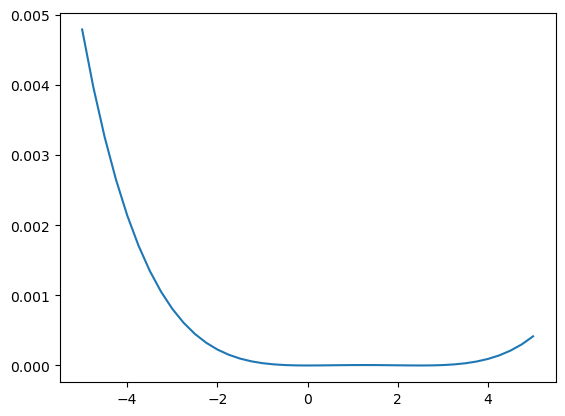

In [28]:
plt.plot(c6_values, nll)
plt.show()